In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
plt.rcParams['figure.figsize'] = (13, 7)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv(r"/content/drive/MyDrive/dataset/netflix_titles.csv")
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
#DATA VISUALIZATION
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


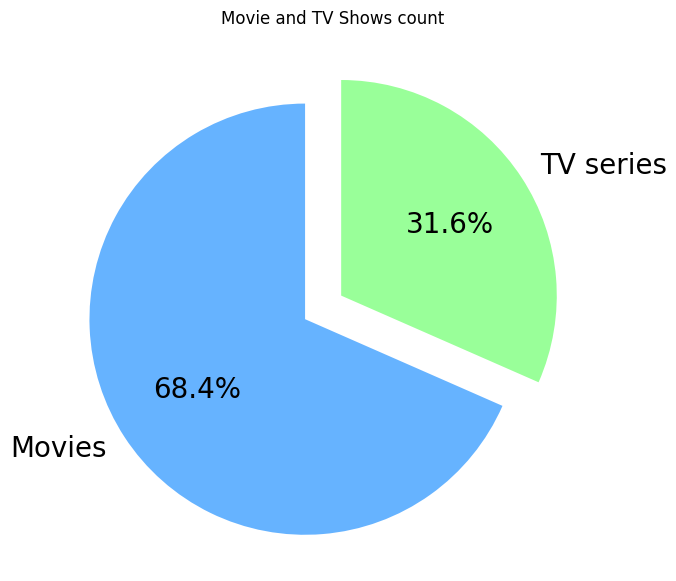

<Figure size 1300x700 with 0 Axes>

In [ ]:
def pie_chart(df, column ,explode , labels,title,no):

    plt.pie(df[column].value_counts(),
            explode=explode,    #explode=[0.04,0]
            startangle=90,
            autopct='%1.1f%%',
            labels=labels, #labels=['Males','Females']
            colors = ['#66b3ff','#99ff99'],
            pctdistance=.6,
            textprops={'fontsize': 20})
    plt.title(title)
    plt.figure(no)

pie_chart(df, "type" ,[0.15,0.05], ['Movies',"TV series"],"Movie and TV Shows count",0)

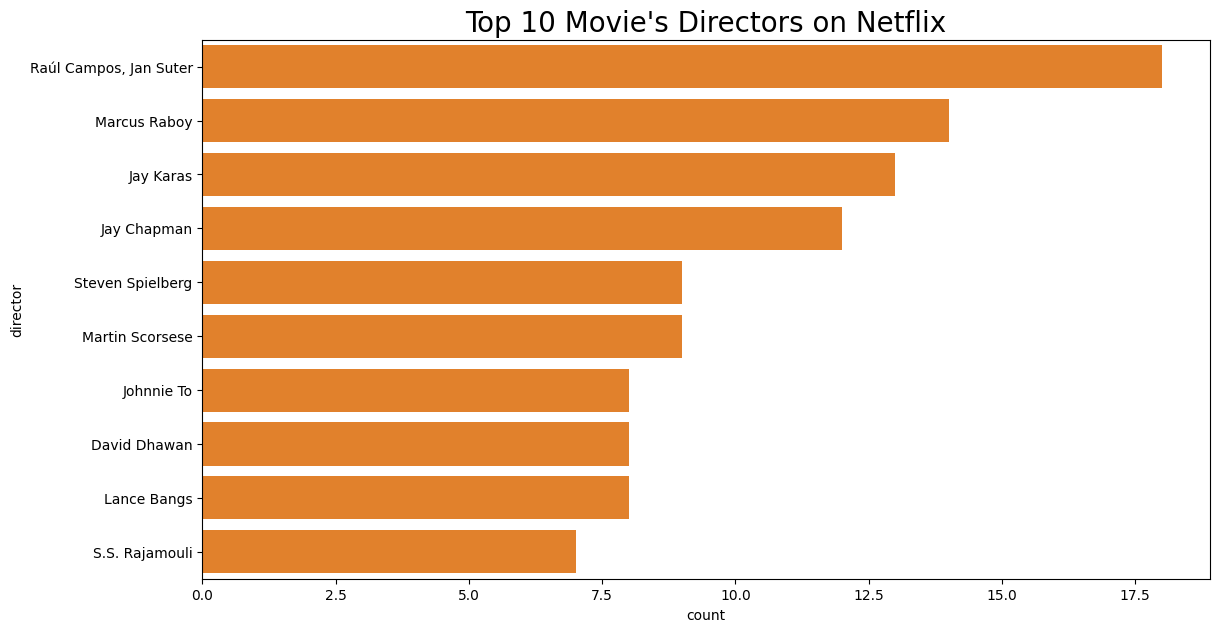

In [ ]:
Top10_movies_directors = df[df['type'] == 'Movie']

base_color = sns.color_palette()[1]

sns.countplot(y = 'director',color= base_color, data = Top10_movies_directors, order = Top10_movies_directors.director.value_counts().head(10).index)

plt.title("Top 10 Movie's Directors on Netflix", fontsize = 20);

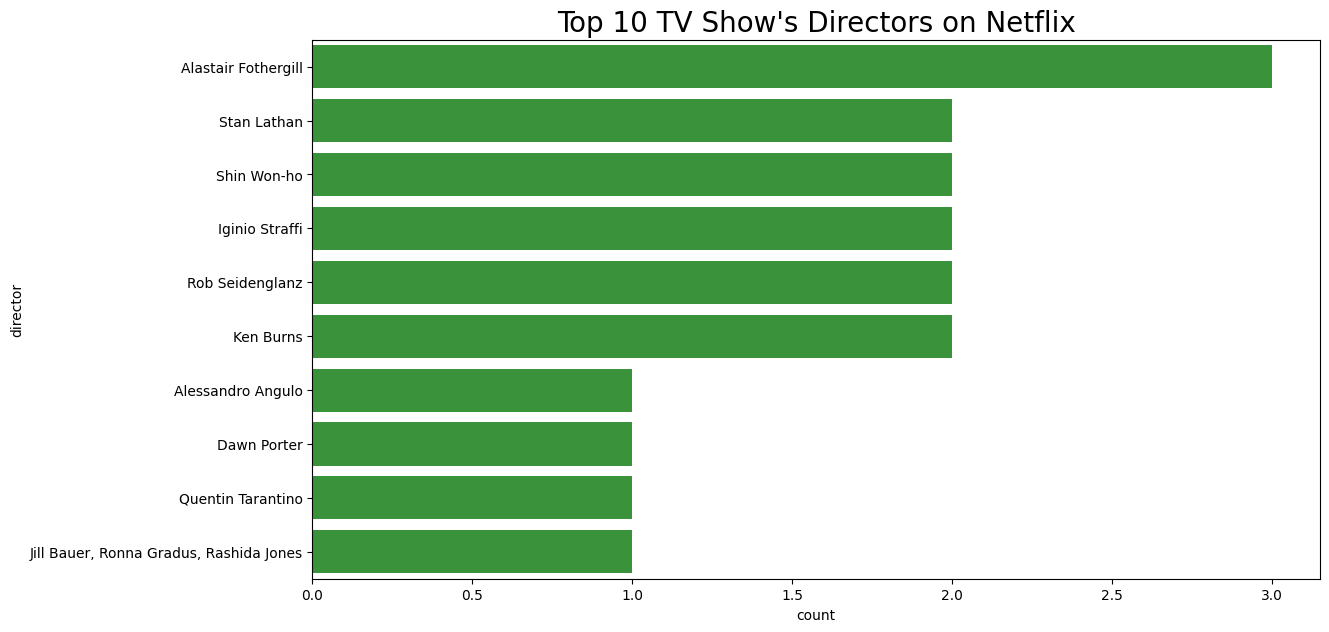

In [ ]:
Top10_Series_directors = df[df['type'] == 'TV Show']

base_color = sns.color_palette()[2]

sns.countplot(y = 'director',color= base_color, data = Top10_Series_directors, order = Top10_Series_directors.director.value_counts().head(10).index)

plt.title("Top 10 TV Show's Directors on Netflix", fontsize = 20);

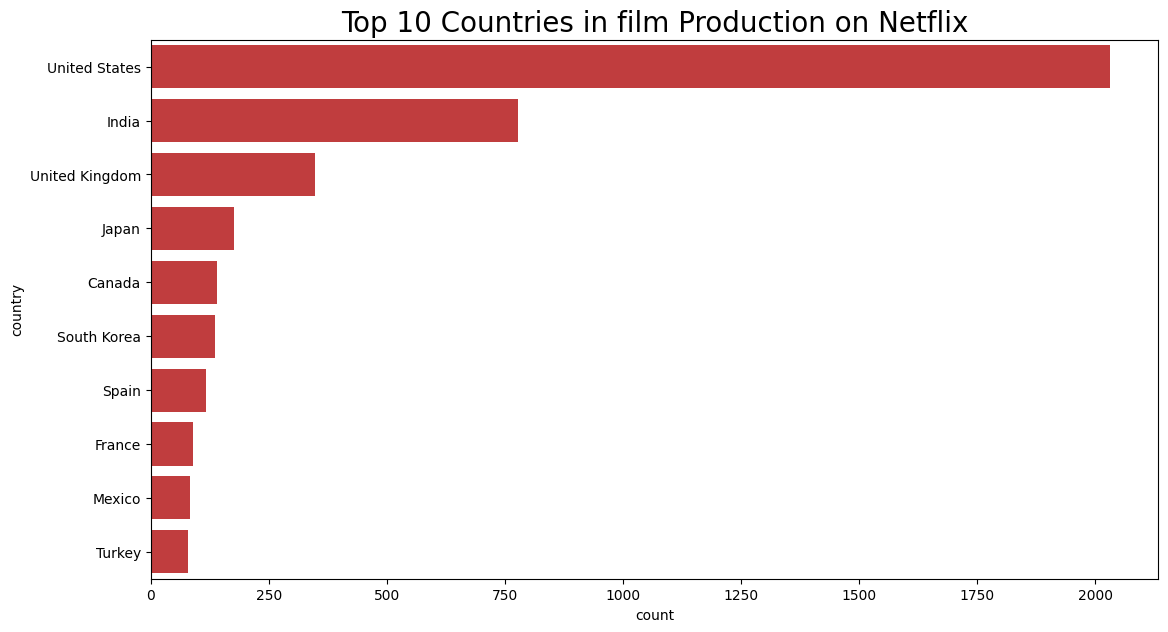

In [ ]:
base_color = sns.color_palette()[3]

sns.countplot(y = 'country',color= base_color, data = df, order = df.country.value_counts().head(10).index)

plt.title("Top 10 Countries in film Production on Netflix", fontsize = 20);

In [ ]:
#DATA CLEANING
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df= df.dropna(subset=['cast','country'], axis = 0)
df['director'] = df['director'].fillna("Unknown")
df = df.reset_index( drop=True)


<ipython-input-48-769c3ea2f995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director'] = df['director'].fillna("Unknown")


In [ ]:
#FEATURE ENGINEERING
df.head(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5271 non-null   int64 
 1   type          5271 non-null   object
 2   title         5271 non-null   object
 3   director      5271 non-null   object
 4   cast          5271 non-null   object
 5   country       5271 non-null   object
 6   date_added    5262 non-null   object
 7   release_year  5271 non-null   int64 
 8   rating        5265 non-null   object
 9   duration      5271 non-null   object
 10  listed_in     5271 non-null   object
 11  description   5271 non-null   object
dtypes: int64(2), object(10)
memory usage: 494.3+ KB


In [ ]:
overall_infos = []
for i in range(0, df.shape[0]):
    overall_infos.append(df['type'][i]+' '+df['title'][i]+' '+df['director'][i]+' '+df['cast'][i]+' '+df['description'][i]+' '+df['country'][i])
df['overall_infos'] = overall_infos

In [ ]:
df.iloc[4505:4509]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
4505,80187301,Movie,All The Reasons To Forget,Pedro Coutinho,"Johnny Massaro, Bianca Comparato, Regina Braga...",Brazil,"April 19, 2018",2017,TV-MA,90 min,"Comedies, Dramas, International Movies",A Brazilian man tries a myriad of ways to get ...,Movie All The Reasons To Forget Pedro Coutinho...
4506,80178971,TV Show,Charité,Unknown,"Alicia von Rittberg, Maximilian Meyer-Bretschn...",Germany,"April 19, 2018",2017,TV-MA,1 Season,"International TV Shows, TV Dramas","At Berlin's Charité hospital in 1888, Ida find...","TV Show Charité Unknown Alicia von Rittberg, M..."
4507,80215782,Movie,Chasing the Dragon,"Wong Jing, Jason Kwan","Donnie Yen, Andy Lau, Philip Keung, Kent Cheng...","Hong Kong, China","April 19, 2018",2017,TV-MA,129 min,"Action & Adventure, Dramas, International Movies","In corrupt, British-colonized Hong Kong, a mai...","Movie Chasing the Dragon Wong Jing, Jason Kwan..."
4508,80172000,Movie,American Experience: Ruby Ridge,Barak Goodman,"Dave Hunt, Bo Gritz, Sara Weaver",United States,"April 19, 2017",2017,TV-MA,53 min,Documentaries,A botched attempt to arrest a white supremacis...,Movie American Experience: Ruby Ridge Barak Go...


In [ ]:
df.insert(1, "id", list(range(1, 5272)), True)

In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Movie Norm of the North: King Sized Adventure ...


In [ ]:
df_new = df[['id','overall_infos']]
df_new.head(1)

,id,overall_infos
0,1,Movie Norm of the North: King Sized Adventure ...


In [ ]:
#TEXT PREPROCESSING
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocessing(column):
    #make all words with lower letters
    column = column.str.lower()
    #getting rid of any punctution
    column = column.str.replace('http\S+|www.\S+|@|%|:|,|', '', case=False)
    #spliting each sentence to words to apply previous funtions on them
    word_tokens = column.str.split()
    keywords = word_tokens.apply(lambda x: [item for item in x if item not in stop])
    #assemble words of each sentence again and assign them in new column
    for i in range(len(keywords)):
        keywords[i] = " ".join(keywords[i])
        column = keywords

    return column

In [ ]:
df_new['cleaned_infos'] = text_preprocessing(df_new['overall_infos'])


<ipython-input-56-038ca8b65fde>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('http\S+|www.\S+|@|%|:|,|', '', case=False)
<ipython-input-57-3dd9eef58360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cleaned_infos'] = text_preprocessing(df_new['overall_infos'])


In [ ]:
df['overall_infos'][6]

'Movie Automata Gabe Ibáñez Antonio Banderas, Dylan McDermott, Melanie Griffith, Birgitte Hjort Sørensen, Robert Forster, Christa Campbell, Tim McInnerny, Andy Nyman, David Ryall In a dystopian future, an insurance adjuster for a tech company investigates a robot killed for violating protocol and discovers a global conspiracy. Bulgaria, United States, Spain, Canada'

In [ ]:
df_new['cleaned_infos'][6]

'movie automata gabe ibáñez antonio banderas dylan mcdermott melanie griffith birgitte hjort sørensen robert forster christa campbell tim mcinnerny andy nyman david ryall dystopian future insurance adjuster tech company investigates robot killed violating protocol discovers global conspiracy. bulgaria united states spain canada'

In [ ]:
#COUNT VECTORIZSTION FOR COSINE SIMILARITY
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_metrix = CV.fit_transform(df_new['cleaned_infos'])

In [ ]:
cosine_similarity = cosine_similarity(converted_metrix)

In [ ]:
cosine_similarity

array([[1.        , 0.04843595, 0.06241878, ..., 0.03933686, 0.04020151,
        0.09249946],
       [0.04843595, 1.        , 0.0831411 , ..., 0.07859438, 0.10709591,
        0.09240617],
       [0.06241878, 0.0831411 , 1.        , ..., 0.1575522 , 0.09200874,
        0.13231403],
       ...,
       [0.03933686, 0.07859438, 0.1575522 , ..., 1.        , 0.08697708,
        0.1250782 ],
       [0.04020151, 0.10709591, 0.09200874, ..., 0.08697708, 1.        ,
        0.102262  ],
       [0.09249946, 0.09240617, 0.13231403, ..., 0.1250782 , 0.102262  ,
        1.        ]])

In [ ]:
#TESTING
df[df['title'].str.contains('Ninja')]

,show_id,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
144,70124316,145,Movie,Five Elements Ninjas,Cheh Chang,"Tien-chi Cheng, Tien Hsiang Lung, Meng Lo, Mic...",Hong Kong,"September 17, 2019",1982,R,104 min,"Action & Adventure, International Movies",When five ninjas whose fighting styles are bas...,Movie Five Elements Ninjas Cheh Chang Tien-chi...
299,70074559,300,Movie,Naruto the Movie: Ninja Clash in the Land of Snow,Tensai Okamura,"Yuri Lowenthal, Maile Flanagan, Sam Regal, Cam...",Japan,"September 1, 2017",2004,NR,83 min,"Action & Adventure, Anime Features, Internatio...","Naruto, Sasuke and Sakura learn they'll be pro...",Movie Naruto the Movie: Ninja Clash in the Lan...
1522,70056441,1523,Movie,Teenage Mutant Ninja Turtles,Kevin Munroe,"Chris Evans, Sarah Michelle Gellar, Mako Iwama...","Hong Kong, United States","May 1, 2019",2007,PG,87 min,"Children & Family Movies, Comedies","In this animated adventure, Master Splinter wh...",Movie Teenage Mutant Ninja Turtles Kevin Munro...
2986,60023856,2987,Movie,Teenage Mutant Ninja Turtles II: The Secret of...,Michael Pressman,"Paige Turco, David Warner, Mark Caso, Michelan...","United States, Hong Kong","January 1, 2020",1991,PG,88 min,"Children & Family Movies, Comedies",The evil Shredder decides that ooze is what gi...,Movie Teenage Mutant Ninja Turtles II: The Sec...
3118,70221672,3119,TV Show,Ninja Turtles: The Next Mutation,Unknown,"Jarred Blancard, Mitchell A. Lee Yuen, Dean Ch...","Canada, United States","January 1, 2016",1997,TV-Y7-FV,1 Season,"Kids' TV, TV Comedies",Everyone's favorite teenage mutants are back i...,TV Show Ninja Turtles: The Next Mutation Unkno...
3125,70213079,3126,TV Show,Power Rangers Ninja Storm,Unknown,"Pua Magasiva, Sally Martin, Glenn McMillan, Ad...","United States, New Zealand","January 1, 2016",2003,TV-Y7-FV,1 Season,Kids' TV,When the elite warriors from the Wind Ninja Ac...,TV Show Power Rangers Ninja Storm Unknown Pua ...
3398,70101697,3399,Movie,Ninja Assassin,James McTeigue,"Rain, Naomie Harris, Ben Miles, Rick Yune, Shô...","Germany, United States","February 1, 2019",2009,R,99 min,Action & Adventure,When his best friend is murdered by the shadow...,"Movie Ninja Assassin James McTeigue Rain, Naom..."
3677,80153226,3678,TV Show,Ninja Hattori,Unknown,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...,"TV Show Ninja Hattori Unknown Junko Hori, Masa..."
4784,80176076,4785,TV Show,Power Rangers Ninja Steel,Unknown,"William Shewfelt, Nico Greetham, Zoe Robins, P...",United States,"October 15, 2018",2018,TV-Y7-FV,2 Seasons,Kids' TV,A new generation of teen heroes uses superhuma...,TV Show Power Rangers Ninja Steel Unknown Will...
5121,70252973,5122,TV Show,LEGO Ninjago: Masters of Spinjitzu,Unknown,"Vincent Tong, Jillian Michaels, Ian James Corl...","Denmark, Singapore, Canada, United States","February 1, 2019",2018,TV-Y7-FV,9 Seasons,Kids' TV,"Kai, Jay, Cole and Zane must master their elem...",TV Show LEGO Ninjago: Masters of Spinjitzu Unk...


In [ ]:
title = 'Teenage Mutant Ninja Turtles'
movie_id = df[df['title'] == title]['id'].values[0]

In [ ]:
score = list(enumerate(cosine_similarity[movie_id]))


In [ ]:
sorted_score = sorted(score, key=lambda x:x[1], reverse= True)
sorted_score = sorted_score[1:]

In [ ]:
sorted_score[0:10]

[(187, 0.28069178610689477),
 (4240, 0.22167554926073635),
 (3027, 0.22110831935702668),
 (1863, 0.2187393196299036),
 (2649, 0.2187393196299036),
 (4001, 0.2187393196299036),
 (4238, 0.2187393196299036),
 (4241, 0.21591675854376524),
 (4239, 0.21320071635561044),
 (307, 0.21125363706585915)]

In [ ]:
i = 0
for item in sorted_score:
    movie_title = df[df['id'] == item[0]]['title'].values[0]
    print(i+1,movie_title)
    i = i+1
    if i > 4:
        break

1 Oh! Baby
2 Jim Gaffigan: King Baby
3 Hell or High Water
4 Angry Indian Goddesses
5 Happyish
